# 사전 작업
## Conda 환경 생성 및 패키지 설치
터미널에서 새로운 conda 환경 생성(anaconda prompt에서)

In [ ]:
conda create -n paddle_env python=3.9 -y
conda activate paddle_env

## 필요한 라이브러리 설치
Conda 환경에서 필요한 모든 라이브러리를 설치

In [ ]:
# PaddlePaddle 및 관련 패키지 설치
conda install -c conda-forge paddlepaddle-gpu
conda install -c conda-forge paddlepaddle
pip install paddleocr

# LabelImg 설치
pip install labelImg

# Scikit-learn 및 기타 필요한 패키지 설치
conda install -c conda-forge scikit-learn
conda install -c conda-forge scikit-image
conda install -c conda-forge threadpoolctl

# 폰트 설치 (필요하면 하셈)
conda install -c conda-forge font-ttf-nanum

# 라이브러리 설치

In [1]:
%pip install paddleocr
%pip install paddlepaddle-gpu
!apt-get update -qq
!apt-get install -qq fonts-nanum
!fc-list | grep "NanumGothic"

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'fc-list'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


# VScode에서 실행할 스크립트

## 전체 코드

In [1]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image
from matplotlib import pyplot as plt

[2024/06/28 15:06:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\user/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\user/.paddleocr/whl\\rec\\korean\\korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num

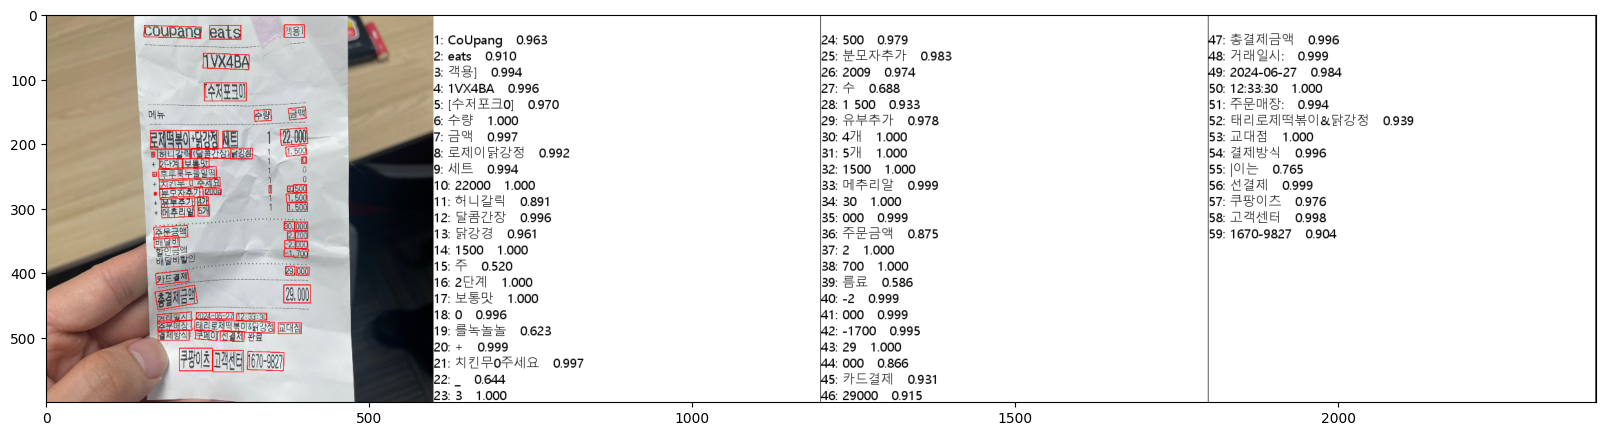

In [26]:
# PaddleOCR 초기화 (한국어 설정)
ocr = PaddleOCR(use_angle_cls=True, lang='korean')

# 이미지 로드
img_path = 'C:/Users/user/Desktop/coupang/images/rec1.jpg'
img = cv2.imread(img_path)

# OCR 수행
result = ocr.ocr(img, cls=True)

def filter_receipt_data(result):
    lines = []
    for line in result[0]:
        text = line[1][0]
        bbox = line[0]  # bounding box 좌표
        lines.append((text, bbox))

    # 필터링 조건에 맞게 데이터 수집
    filtered_lines = []
    capturing = False
    quantity_x = None  # 수량 열의 x 좌표 기준점
    for i, (text, bbox) in enumerate(lines):
        if any(keyword in text for keyword in ['수량', '금액']):
            quantity_x = bbox[0][0]  # 수량 열의 x 좌표 설정
            # 다음 라인부터 모든 것을 수집
            capturing = True
            continue
        elif capturing:
            # 수량 열의 왼쪽에 있는 텍스트만 필터링
            if bbox[0][0] < quantity_x:
                filtered_lines.append(text)

    return filtered_lines

# 결과 필터링
filtered_data = filter_receipt_data(result)

# 필터링된 데이터 출력
for line in filtered_data:
    print(line)

def visualize_ocr_result(img_path, result):
    image = Image.open(img_path).convert('RGB')
    boxes = [line[0] for line in result[0]]
    txts = [line[1][0] for line in result[0]]
    scores = [line[1][1] for line in result[0]]
    
    im_show = draw_ocr(image, boxes, txts, scores, font_path='C:/Windows/Fonts/malgun.ttf')
    im_show = Image.fromarray(im_show)

    plt.figure(figsize=(20, 20))
    plt.imshow(im_show)
    plt.show()

# OCR 결과 시각화
visualize_ocr_result(img_path, result)